In [26]:
import pandas as pd
import numpy as np

In [3]:
usZipCodeData = pd.read_csv('http://people.bu.edu/kalathur/datasets/uszips.csv',
 converters={'zip': lambda x: str(x)})

In [27]:
usZipCodeData.head()

,zip,lat,lng,city,state_id,state_name,population,density,county_name,timezone
0,01001,42.0626,-72.6259,Agawam,MA,Massachusetts,16769,565.8,Hampden,America/New_York
1,01002,42.3749,-72.4621,Amherst,MA,Massachusetts,29049,203.8,Hampshire,America/New_York
2,01003,42.3919,-72.5248,Amherst,MA,Massachusetts,10372,5629.7,Hampshire,America/New_York
3,01005,42.4202,-72.1061,Barre,MA,Massachusetts,5079,44.3,Worcester,America/New_York
4,01007,42.2787,-72.4003,Belchertown,MA,Massachusetts,14649,107.4,Hampshire,America/New_York


In [19]:
##Q1
usZipCodeData.population.describe()

count     32968.000000
mean       9364.370389
std       13670.580420
min           0.000000
25%         733.000000
50%        2779.500000
75%       12814.750000
max      113916.000000
Name: population, dtype: float64

In [31]:
##Q2
usZipCodeData.zip[usZipCodeData['population']<1000].count()

9995

In [45]:
##Q3
usZipCodeData=usZipCodeData[usZipCodeData['population']>=1000]
usZipCodeData= usZipCodeData.reindex(np.arange(usZipCodeData.zip.count())\
    , method='ffill')
usZipCodeData.head(10)

,zip,lat,lng,city,state_id,state_name,population,density,county_name,timezone
0,01001,42.0626,-72.6259,Agawam,MA,Massachusetts,16769.0,565.8,Hampden,America/New_York
1,01002,42.3749,-72.4621,Amherst,MA,Massachusetts,29049.0,203.8,Hampshire,America/New_York
2,01003,42.3919,-72.5248,Amherst,MA,Massachusetts,10372.0,5629.7,Hampshire,America/New_York
3,01005,42.4202,-72.1061,Barre,MA,Massachusetts,5079.0,44.3,Worcester,America/New_York
4,01007,42.2787,-72.4003,Belchertown,MA,Massachusetts,14649.0,107.4,Hampshire,America/New_York
5,01008,42.1843,-72.9520,Blandford,MA,Massachusetts,1263.0,9.1,Hampden,America/New_York
6,01008,42.1843,-72.9520,Blandford,MA,Massachusetts,1263.0,9.1,Hampden,America/New_York
7,01010,42.1286,-72.2062,Brimfield,MA,Massachusetts,3609.0,40.1,Hampden,America/New_York
8,01011,42.2966,-72.9597,Chester,MA,Massachusetts,1370.0,16.7,Hampden,America/New_York
9,01011,42.2966,-72.9597,Chester,MA,Massachusetts,1370.0,16.7,Hampden,America/New_York


In [40]:
##Q4
usZipCodeData.population.describe()
## count is obviously smaller, mean, min, quantiles, higher.
## max is the same.
## stdev is smaller, make sense

count     16354.000000
mean      11954.517855
std       13524.544302
min        1000.000000
25%        2376.000000
50%        6020.000000
75%       17351.000000
max      113916.000000
Name: population, dtype: float64

In [46]:
##Q5
ma_StateData= usZipCodeData[usZipCodeData['state_name']=='Massachusetts']
ma_StateData.head()

,zip,lat,lng,city,state_id,state_name,population,density,county_name,timezone
0,01001,42.0626,-72.6259,Agawam,MA,Massachusetts,16769.0,565.8,Hampden,America/New_York
1,01002,42.3749,-72.4621,Amherst,MA,Massachusetts,29049.0,203.8,Hampshire,America/New_York
2,01003,42.3919,-72.5248,Amherst,MA,Massachusetts,10372.0,5629.7,Hampshire,America/New_York
3,01005,42.4202,-72.1061,Barre,MA,Massachusetts,5079.0,44.3,Worcester,America/New_York
4,01007,42.2787,-72.4003,Belchertown,MA,Massachusetts,14649.0,107.4,Hampshire,America/New_York


In [47]:
## Q6
ma_StateData.population.describe()
## smaller count, higher mean, smaller stdev (make sense, more alike values)
## min, quantiles higher, max is smaller.

count      538.000000
mean     13246.195167
std      11941.778786
min       1023.000000
25%       3784.500000
50%       9671.000000
75%      17802.500000
max      61025.000000
Name: population, dtype: float64

In [48]:
import matplotlib.pyplot as plt

(array([218., 104.,  85.,  42.,  41.,  17.,  15.,   8.,   3.,   5.]),
 array([ 1023. ,  7023.2, 13023.4, 19023.6, 25023.8, 31024. , 37024.2,
        43024.4, 49024.6, 55024.8, 61025. ]),
 <a list of 10 Patch objects>)

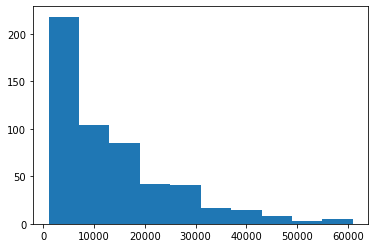

In [49]:
### Q7
plt.hist(ma_StateData.population)

In [ ]:
### population on massachusets state shows a right skeewed
### distribution of values, which implies that the mode and median
### are lower than the mean
### the histogam also show us that the state has
### a high concentration of zipcodes with less than 20,000 people


In [61]:
##Q8
topzip_20_density =ma_StateData.sort_values(by='density', ascending=False)[['zip','density']].head(20)
print(topzip_20_density)

       zip  density
335  02113  26621.2
337  02115  15493.4
385  02215  13184.0
338  02116  12629.5
331  02108  10828.1
334  02111  10547.8
336  02114  10286.0
370  02163  10057.4
341  02120   9444.0
339  02118   9336.1
357  02139   9009.3
415  02446   8793.4
362  02144   8525.7
332  02109   8358.3
383  02199   7731.5
382  02199   7731.5
275  01902   7252.5
359  02141   7164.6
363  02145   7036.8
354  02135   6269.0


In [62]:
##Q9
topzip_20_population=ma_StateData.sort_values(by='population', ascending=False)[['zip','population']].head(20)
print(topzip_20_population)

       zip  population
386  02301     61025.0
364  02148     59503.0
369  02155     57964.0
403  02360     56271.0
371  02169     55055.0
367  02151     51808.0
297  01960     50944.0
534  02780     49036.0
344  02124     47783.0
257  01844     47249.0
255  01841     47225.0
76   01201     46504.0
275  01902     45139.0
503  02703     43593.0
502  02703     43593.0
516  02740     43087.0
354  02135     42780.0
365  02149     41550.0
52   01085     41117.0
53   01085     41117.0


In [91]:
###Q10
[x for x in np.array(topzip_20_population.zip) if x in np.array(topzip_20_density.zip)]

['01902', '02135']

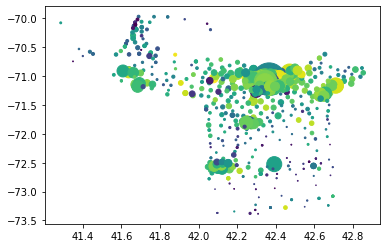

In [95]:
###Q11
x= ma_StateData.lat
y= ma_StateData.lng
colors= np.log(ma_StateData.population)
size = np.multiply(ma_StateData.density, 1/25)
plt.scatter(x,y, c= colors, s= size)

(-1.1129928306416546,
 1.1006187084465824,
 -1.1022311507147013,
 1.1130696137195224)

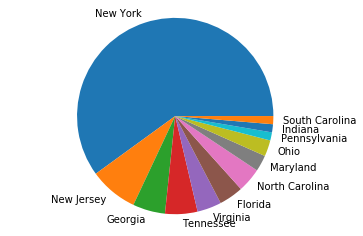

In [103]:
##Q12
top_75=usZipCodeData.sort_values(by='population', ascending= False).head(75)
labels = pd.Series(top_75.state_name).unique()
values = pd.Series(top_75.state_name).value_counts()
plt.pie(values, labels=labels)
plt.axis('equal')

<BarContainer object of 10 artists>

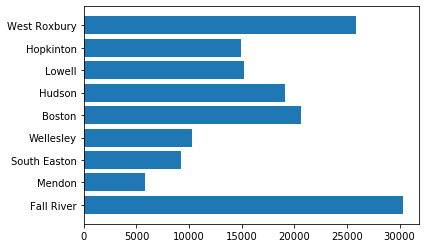

In [129]:
##q13
np.random.seed(6805)
rows=np.random.randint(ma_StateData.zip.count(), size=10).tolist()
data=ma_StateData.iloc[rows]
plt.barh(data.city, data.population)